In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv(r'C:\Users\kamil\Desktop\python course stuff\Twitch_game_data.csv\Twitch_game_data.csv',)
data

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,196,War Thunder,6,2021,704459,73613 hours,8812,223,7035,979,102,9.57
13196,197,Muck,6,2021,701456,31741 hours,60091,112,8591,975,44,22.10
13197,198,Trials Rising,6,2021,698899,4626 hours,217333,26,581,972,6,151.08
13198,199,Little Nightmares II,6,2021,695130,27581 hours,43518,105,6128,966,38,25.20


In [2]:
data.isna().sum()/len(data)*100


Rank                0.000000
Game                0.007576
Month               0.000000
Year                0.000000
Hours_watched       0.000000
Hours_Streamed      0.000000
Peak_viewers        0.000000
Peak_channels       0.000000
Streamers           0.000000
Avg_viewers         0.000000
Avg_channels        0.000000
Avg_viewer_ratio    0.000000
dtype: float64

In [3]:
data.dropna(axis=0,inplace=True)

data["Hours_Streamed"]= data["Hours_Streamed"].apply(lambda x:int(x[:-6]))
data

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,196,War Thunder,6,2021,704459,73613,8812,223,7035,979,102,9.57
13196,197,Muck,6,2021,701456,31741,60091,112,8591,975,44,22.10
13197,198,Trials Rising,6,2021,698899,4626,217333,26,581,972,6,151.08
13198,199,Little Nightmares II,6,2021,695130,27581,43518,105,6128,966,38,25.20


In [4]:
data['streamed by watched ratio'] = data["Hours_Streamed"]/data["Hours_watched"]
data

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,streamed by watched ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29,0.014432
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,0.017354
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,0.009591
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29,0.005907
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,0.071292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,196,War Thunder,6,2021,704459,73613,8812,223,7035,979,102,9.57,0.104496
13196,197,Muck,6,2021,701456,31741,60091,112,8591,975,44,22.10,0.045250
13197,198,Trials Rising,6,2021,698899,4626,217333,26,581,972,6,151.08,0.006619
13198,199,Little Nightmares II,6,2021,695130,27581,43518,105,6128,966,38,25.20,0.039677


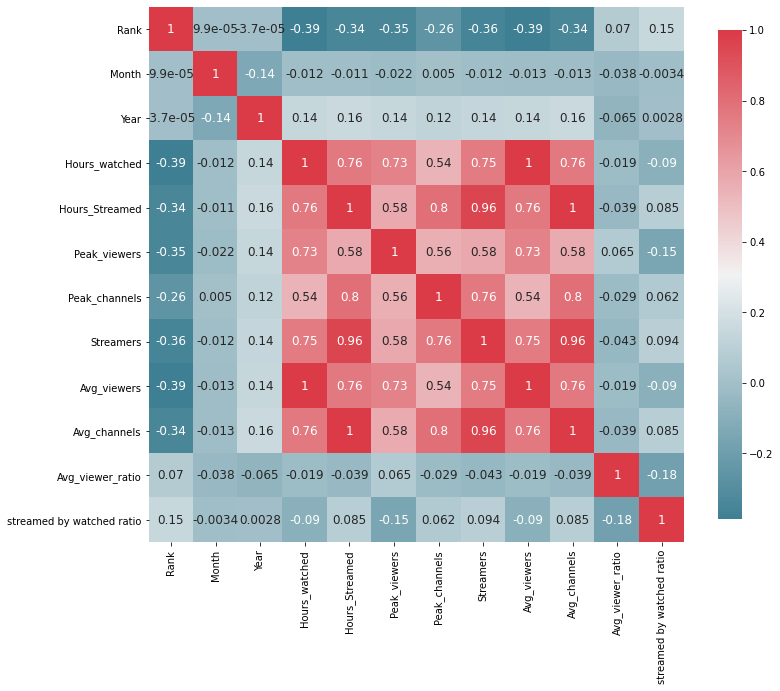

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
    
#This fonction calculates the correlation betwen two features and gives a value between -1 and 1, a big value means
#that the increase of a feature increases the other, a small value is the opposite, and a value of 0 means no correlation.
    
plot_correlation_map(data)

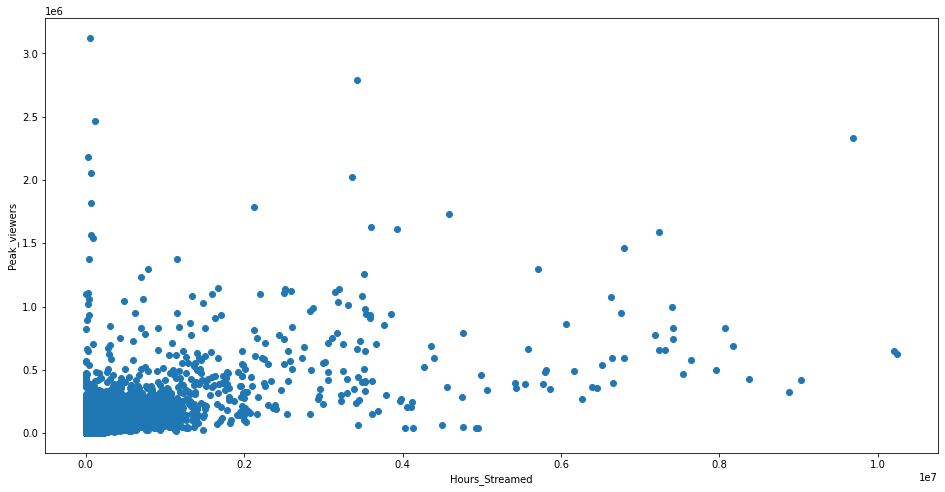

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Hours_Streamed'], data['Peak_viewers'])
ax.set_xlabel('Hours_Streamed')
ax.set_ylabel('Peak_viewers')
plt.show()

In [7]:
#rank as target
x=data[["Month", "Year", "Hours_watched", "Hours_Streamed", "Peak_viewers", "Peak_channels", "Streamers", "Avg_viewers", "Avg_channels", "Avg_viewer_ratio", "streamed by watched ratio"]]
y=data["Rank"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 2725.617663791308
R squared 0.192020966348884


<AxesSubplot:>

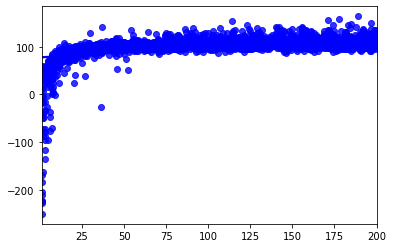

In [12]:
sns.regplot(x=y_test, y=predicted, ci=None, color="b")

In [5]:
x=data[["Month", "Year", "Hours_watched", "Hours_Streamed", "Peak_viewers", "Peak_channels", "Streamers", "Avg_viewers", "Avg_channels", "Avg_viewer_ratio", "streamed by watched ratio"]]
y=data["Rank"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  763919.8745974735
R squared:  -225.45554813641238


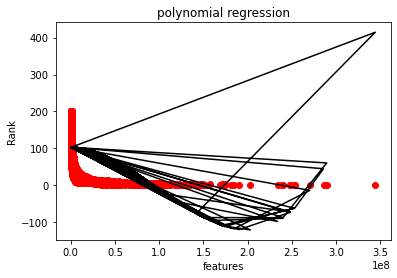

In [9]:
x= data["Hours_watched"].values.reshape(-1,1)
y= data["Rank"].values
poly = PolynomialFeatures(degree = 3) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("polynomial regression")
plt.ylabel("Rank")
plt.xlabel("features")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [10]:
#Avg_viewers as target
x=data[["Rank", "Hours_watched", "Hours_Streamed", "Peak_viewers", "Peak_channels", "Streamers", "Avg_channels",]]
y=data["Avg_viewers"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 128993.22650246783
R squared 0.9997845988445716


<AxesSubplot:>

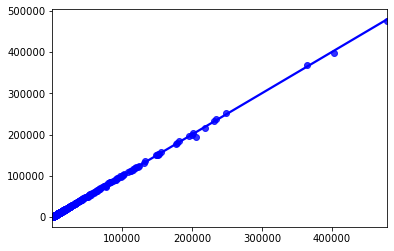

In [11]:
sns.regplot(x=y_test, y=predicted, ci=None, color="b")

In [12]:
x=data[["Rank", "Hours_watched", "Hours_Streamed", "Peak_viewers", "Peak_channels", "Streamers", "Avg_channels",]]
y=data["Avg_viewers"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  19084482163.773655
R squared:  -30.86849124012411


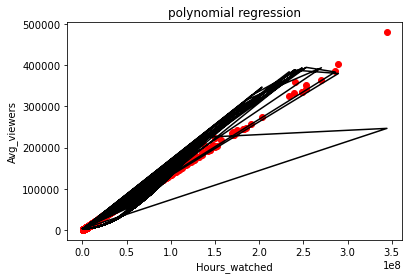

In [13]:
x= data["Hours_watched"].values.reshape(-1,1)
y= data["Avg_viewers"].values
poly = PolynomialFeatures(degree = 3) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("polynomial regression")
plt.ylabel("Avg_viewers")
plt.xlabel("Hours_watched")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")

In [15]:
x=data[["Rank", "Hours_watched", "Hours_Streamed", "Peak_viewers", "Peak_channels", "Streamers", "Avg_channels",]]
y=data["Avg_viewers"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  28819.27496725549
R squared:  0.9999518757279365


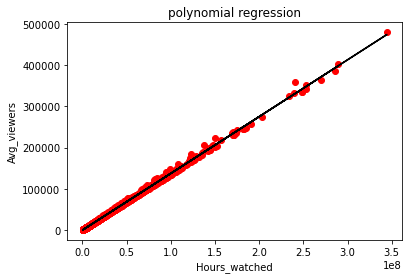

In [16]:
x= data["Hours_watched"].values.reshape(-1,1)
y= data["Avg_viewers"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("polynomial regression")
plt.ylabel("Avg_viewers")
plt.xlabel("Hours_watched")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")